# **Predicting Pancreatic Cancer with Urinary Biomarkers**

## Introduction

Pancreatic ductal adenocarcinoma (PDAC) is an extremely deadly cancer in that once symptoms arise in a patient, it is often already in advanced stages.  With the goal of developing a diagnostic test to screen for PDAC early, researchers have collected data on four urinary biomarkers that have previously been identified to show promise in detecting PDAC.  The four urinary biomarkers are:
*   REG1B:  A protein that may be associated with pancreas regeneration.
*   Creatinine:  A protein that is often used as an indicator of kidney function.
*   LYVE1 (lymphatic vessel endothelial hyaluronan receptor 1):  A protein that may play a role in tumor metastasis.
*   TFF1 (trefoil factor 1):  May be related to regeneration and repair of the urinary tract.

The data was gathered from three patient groups (i.e. independent groups):  healthy patients (control group), patients with non-cancerous pancreatic condition, and patients with PDAC.  Through statistical tests, the following analysis will research the question of whether any of these biomarkers are clear indicators of PDAC, and if so, by how much.


## Hypothesis

For each of the four biomarkers, the following analysis will run statistical tests to determine if there is a significant difference between the three groups of patients.  For each of the tests, the null hypothesis (Ho) is that there is no significant difference; whereas, the hypothesis (Ha) is that there is a significant difference. 

## Data

The data comes from kaggle.  As shown below, it contains 590 observations (i.e. patients) with the following breakdown according to a value of 1, 2, or 3 in the diagnosis column:
*   1 (healthy patients, i.e. control group) contains 183 patients.
*   2 (patients with non-cancerous pancreatic condition) contains 208 patients.
*   3 (patients with PDAC) contains 199 patients.

The data has 14 variables.  Four of the columns contain null values; however, these four columns will not be used in this experiment.  The four biomarkers to test (REG1B, creatinine, LYVE1, and TFF1) are all numerical and each has its own column.  Each patient’s age and sex is also identified by columns in the dataset.

Set up the environment:

In [1]:
%matplotlib inline
import pandas as pd
import math
import io
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

Read the csv file into a dataframe and start exploring the dataframe:

In [2]:
url='https://drive.google.com/file/d/1ylWyvrFZXrJ659--TXUmfp0yxBVV7M9A/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
pdac_data = pd.read_csv(dwn_url)
print(pdac_data.head(10))
print(pdac_data.info())

  sample_id patient_cohort sample_origin  ...      REG1B        TFF1     REG1A
0        S1        Cohort1          BPTB  ...   52.94884  654.282174  1262.000
1       S10        Cohort1          BPTB  ...   94.46703  209.488250   228.407
2      S100        Cohort2          BPTB  ...  102.36600  461.141000       NaN
3      S101        Cohort2          BPTB  ...   60.57900  142.950000       NaN
4      S102        Cohort2          BPTB  ...   65.54000   41.088000       NaN
5      S103        Cohort2          BPTB  ...   62.12600   59.793000       NaN
6      S104        Cohort2          BPTB  ...  152.27700  117.516000       NaN
7      S105        Cohort2          BPTB  ...    3.73000   40.294000       NaN
8      S106        Cohort2          BPTB  ...    7.02100   26.782000       NaN
9      S107        Cohort2          BPTB  ...   83.92800   19.185000       NaN

[10 rows x 14 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #

Next, create three dataframes representing the three patient groups:  1 (healthy patients, i.e. control group), 2 (patients with non-cancerous pancreatic condition), 3 (patients with PDAC):

In [3]:
pdac_1 = pdac_data[pdac_data['diagnosis'] == 1]
print("There are {} healthy patients in the study.".format(pdac_1.shape[0]))

There are 183 healthy patients in the study.


In [4]:
pdac_2 = pdac_data[pdac_data['diagnosis'] == 2]
print("There are {} patients with a non-cancerous pancreatic condition in the study.".format(pdac_2.shape[0]))

There are 208 patients with a non-cancerous pancreatic condition in the study.


In [5]:
pdac_3 = pdac_data[pdac_data['diagnosis'] == 3]
print("There are {} patients with PDAC in the study.".format(pdac_3.shape[0]))

There are 199 patients with PDAC in the study.


## Methods and Results

### Testing the REG1B Biomarker for Significant Difference Between Groups

First, on the REG1B biomarker, check for a normal distribution within each group.
Do a visual examination with a single histrogram:

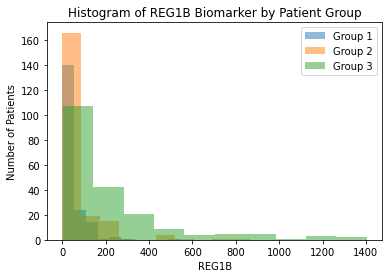

In [6]:
plt.hist(pdac_1['REG1B'], alpha = 0.5, label = 'Group 1')
plt.hist(pdac_2['REG1B'], alpha = 0.5, label = 'Group 2')
plt.hist(pdac_3['REG1B'], alpha = 0.5, label = 'Group 3')
plt.title("Histogram of REG1B Biomarker by Patient Group")
plt.xlabel('REG1B')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

Or, more clearly, over separate histograms:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff558922850>,
      dtype=object)

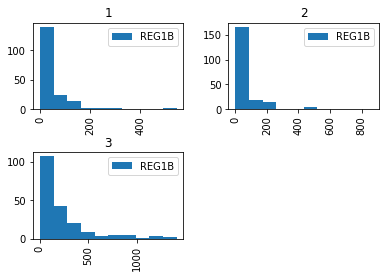

In [7]:
pdac_data['REG1B'].hist(by = pdac_data['diagnosis'], legend=True)

Also, check skewness and kurtosis:

In [8]:
print(stats.describe(pdac_1['REG1B']))
print(stats.describe(pdac_2['REG1B']))
print(stats.describe(pdac_3['REG1B']))

DescribeResult(nobs=183, minmax=(0.001104422, 543.55392), mean=41.32790120613115, variance=3825.837239265181, skewness=3.951679461801243, kurtosis=24.139076353248978)
DescribeResult(nobs=208, minmax=(0.00280488, 864.36693), mean=64.17451034125, variance=13471.239593072722, skewness=3.7371387082467713, kurtosis=17.156927266643123)
DescribeResult(nobs=199, minmax=(1.6517835, 1403.8976), mean=226.3085873472362, variance=76838.08091340112, skewness=2.02647691288193, kurtosis=4.026844017329004)


For all three groups, the kurtosis is outside the accepted range (-3 < K < 3) to satisfy the normal distribution approximation, and skewness is out of range for two out of three.  Moreover, the nonnormality is clearly reflected in the above histograms.  Therefore, these distributions will be considered nonnormal, and the nonparametric test, Kruskal-Wallis, will be used to test for significant difference among the groups.

Start with a 3-group Kruskal-Wallis test:

In [9]:
stats.kruskal(pdac_1['REG1B'], pdac_2['REG1B'], pdac_3['REG1B'])

KruskalResult(statistic=133.21302258156658, pvalue=1.1834766332920447e-29)

The p-value indicates that there is a significant difference in the mean REG1B biomarker between groups.  The null hypothesis can be rejected.

Next, run pairwise Kruskal-Wallis tests to further quantify the differences.

**Group 1** (healthy patients, i.e. control group) to **Group 2** (patients with non-cancerous pancreatic condition):

In [10]:
stats.kruskal(pdac_1['REG1B'], pdac_2['REG1B'])

KruskalResult(statistic=1.2981665016538402, pvalue=0.2545484049329816)

Between Group 1 and Group 2, the p-value (> 0.05) indicates that there is not a significant difference in the mean REG1B.

**Group 2** (patients with non-cancerous pancreatic condition) to **Group 3** (patients with PDAC):

In [11]:
stats.kruskal(pdac_2['REG1B'], pdac_3['REG1B'])

KruskalResult(statistic=89.10164331203218, pvalue=3.750393060438009e-21)

Between Group 2 and Group 3, the p-value indicates that there is a significant difference in the mean REG1B.

**Group 1** (healthy patients, i.e. control group) to **Group 3** (patients with PDAC):

In [12]:
stats.kruskal(pdac_1['REG1B'], pdac_3['REG1B'])

KruskalResult(statistic=109.32490814480717, pvalue=1.377503809370156e-25)

Between Group 1 and Group 3, the p-value indicates that there is a significant difference in the mean REG1B, and this is the largest difference among the tests.  Calculate the confidence internal for this difference in means:

In [13]:
def get_95_ci(group_list, array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("Comparing Group {} and Group {}, the difference in mean {} at the 95% confidence interval (two-tail) is between {} and {}.".format(str(group_list[0]), str(group_list[1]), array_1.name, str(ci_lower), str(ci_upper)))
    
get_95_ci([1, 3], pdac_1['REG1B'], pdac_3['REG1B'])

'Comparing Group 1 and Group 3, the difference in mean REG1B at the 95% confidence interval (two-tail) is between 145.43785134310818 and 224.52352093910193.'

The test shows that with 95% confidence, patients with PDAC have REG1B levels that are greater than those of healthy patients by an amount between 145 and 225 on average.

Finally, visualize the difference in means with a boxplot:

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


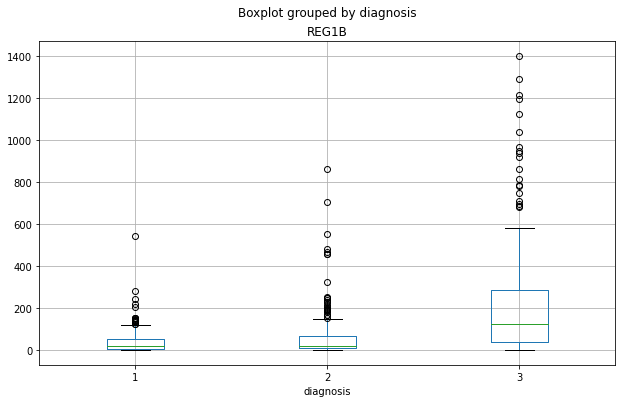

In [14]:
pdac_data.boxplot('REG1B', by='diagnosis', figsize=(10, 6))

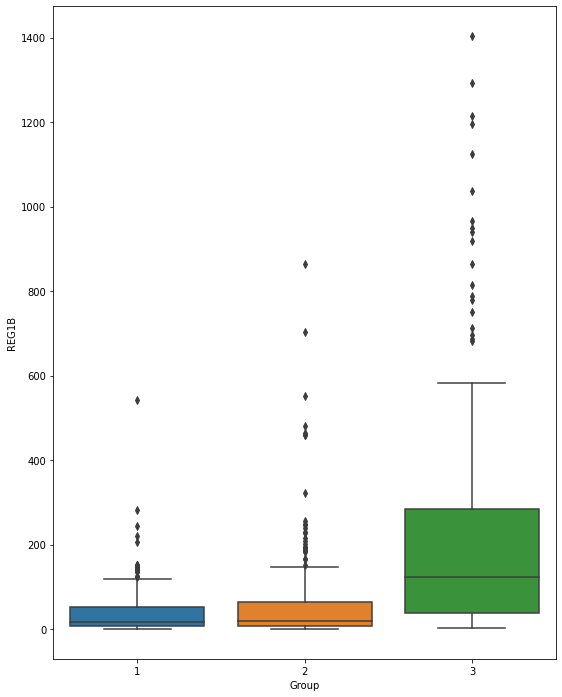

In [15]:
plt.figure(figsize=[9,12])
ax = sns.boxplot(y='REG1B', x='diagnosis', data=pdac_data).set(xlabel='Group')

Group 3 clearly has the greatest mean REG1B, while also having many more outliers on the high end.

### Testing the Creatinine Biomarker for Significant Difference Between Groups

For the Creatinine biomarker, follow the same steps as above to check for a normal distribution within each group:

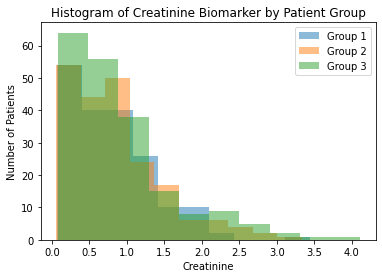

In [16]:
plt.hist(pdac_1['creatinine'], alpha = 0.5, label = 'Group 1')
plt.hist(pdac_2['creatinine'], alpha = 0.5, label = 'Group 2')
plt.hist(pdac_3['creatinine'], alpha = 0.5, label = 'Group 3')
plt.title("Histogram of Creatinine Biomarker by Patient Group")
plt.xlabel('Creatinine')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5584ec890>,
      dtype=object)

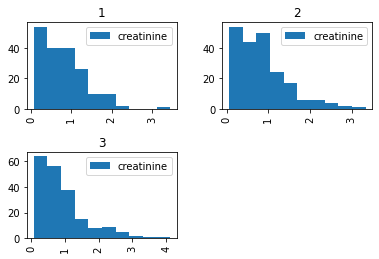

In [17]:
pdac_data['creatinine'].hist(by = pdac_data['diagnosis'], legend=True)

In [18]:
print(stats.describe(pdac_1['creatinine']))
print(stats.describe(pdac_2['creatinine']))
print(stats.describe(pdac_3['creatinine']))

DescribeResult(nobs=183, minmax=(0.06786, 3.44955), mean=0.7976331147540984, variance=0.31272087490398126, skewness=1.1357393421411477, kurtosis=1.9956883872965703)
DescribeResult(nobs=208, minmax=(0.05655, 3.33645), mean=0.8479291875000001, variance=0.3792978347955734, skewness=1.2791558240537617, kurtosis=1.697296184159339)
DescribeResult(nobs=199, minmax=(0.07917, 4.11684), mean=0.916280502512563, variance=0.5239010316411603, skewness=1.59594066385511, kurtosis=2.722845468696846)


Visually, the distributions appear nonnormal.  Moreover, one of the kurtosis values (2.72) is near the accepted limit of 3 for a normal approximation; therefore, these distributions will be considered nonnormal, and the nonparametric test, Kruskal-Wallis, will be used to test for significant difference among the groups.

Start with a 3-group Kruskal-Wallis test:

In [19]:
stats.kruskal(pdac_1['creatinine'], pdac_2['creatinine'], pdac_3['creatinine'])

KruskalResult(statistic=1.1119699639104208, pvalue=0.5735070887661871)

The p-value (> 0.05) indicates that there is not a significant difference in the mean Creatinine biomarker between groups.  The null hypothesis can not be rejected.  There is no need to continue with pairwise tests for the Creatinine biomarker.  

The boxplot confirms the high p-value by showing little difference in the means, even though Group 3(patients with PDAC) has more Creatinine outliers on the high end:

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


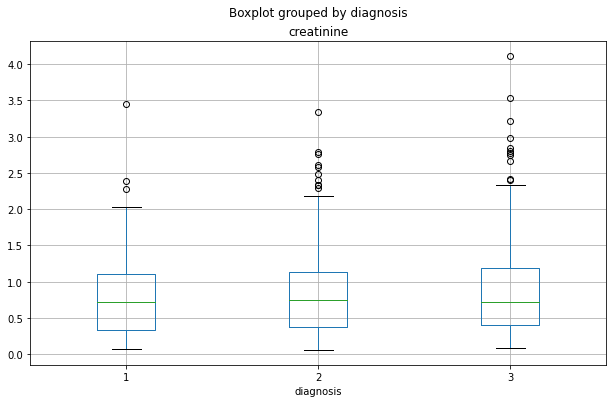

In [20]:
pdac_data.boxplot('creatinine', by='diagnosis', figsize=(10, 6))

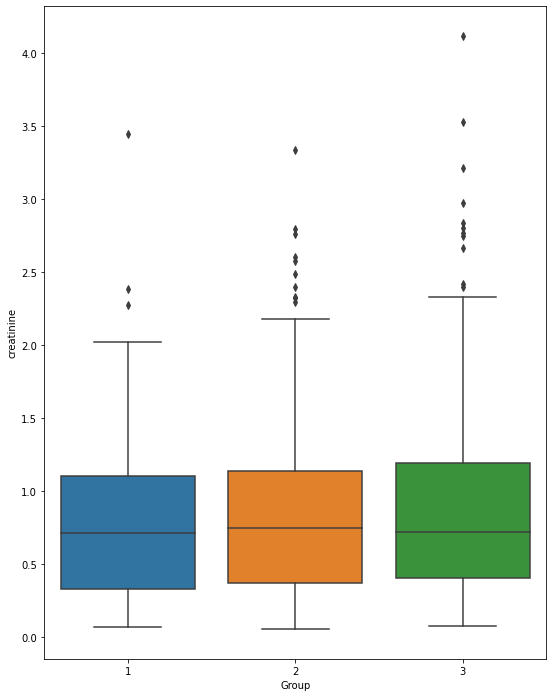

In [21]:
plt.figure(figsize=[9,12])
ax = sns.boxplot(y='creatinine', x='diagnosis', data=pdac_data).set(xlabel='Group')

### Testing the LYVE1 Biomarker for Significant Difference Between Groups

For the LYVE1 biomarker, follow the same steps as above to check for a normal distribution within each group:

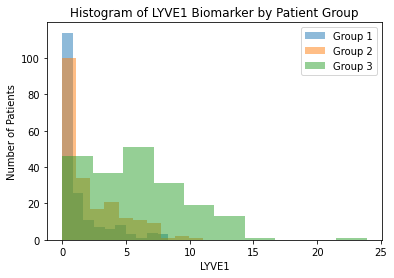

In [22]:
plt.hist(pdac_1['LYVE1'], alpha = 0.5, label = 'Group 1')
plt.hist(pdac_2['LYVE1'], alpha = 0.5, label = 'Group 2')
plt.hist(pdac_3['LYVE1'], alpha = 0.5, label = 'Group 3')
plt.title("Histogram of LYVE1 Biomarker by Patient Group")
plt.xlabel('LYVE1')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5588a3f10>,
      dtype=object)

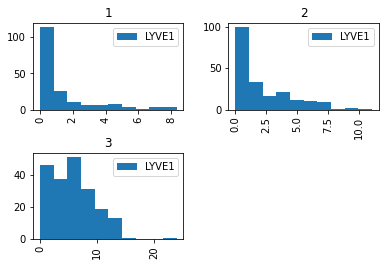

In [23]:
pdac_data['LYVE1'].hist(by = pdac_data['diagnosis'], legend=True)

In [24]:
print(stats.describe(pdac_1['LYVE1']))
print(stats.describe(pdac_2['LYVE1']))
print(stats.describe(pdac_3['LYVE1']))

DescribeResult(nobs=183, minmax=(0.00012943, 8.319249), mean=1.2128873083661205, variance=3.6705470451550934, skewness=1.917530097539175, kurtosis=3.124841628468266)
DescribeResult(nobs=208, minmax=(0.0002262, 11.0401), mean=2.084611925682692, variance=5.624028425759458, skewness=1.2395006874301242, kurtosis=0.8351676478717232)
DescribeResult(nobs=199, minmax=(0.00126672, 23.890323), mean=5.78856679758794, variance=14.288307049009108, skewness=0.8195549032012825, kurtosis=1.4649249737732992)


Visually, the distributions appear nonnormal.  Moreover, one of the kurtosis values (3.12) is outside the accepted range for a normal approximation; therefore, these distributions will be considered nonnormal, and the nonparametric test, Kruskal-Wallis, will be used to test for significant difference among the groups.

Start with a 3-group Kruskal-Wallis test:

In [25]:
stats.kruskal(pdac_1['LYVE1'], pdac_2['LYVE1'], pdac_3['LYVE1'])

KruskalResult(statistic=208.88128333638335, pvalue=4.385363898668236e-46)

The p-value indicates that there is a significant difference in the mean LYVE1 biomarker between groups.  The null hypothesis can be rejected.

Next, run pairwise Kruskal-Wallis tests to further quantify the differences.

**Group 1** (healthy patients, i.e. control group) to **Group 2** (patients with non-cancerous pancreatic condition):

In [26]:
stats.kruskal(pdac_1['LYVE1'], pdac_2['LYVE1'])

KruskalResult(statistic=22.552674700178727, pvalue=2.0445966740913117e-06)

Between Group 1 and Group 2, the p-value indicates that there is a significant difference in the mean LYVE1.

**Group 2** (patients with non-cancerous pancreatic condition) to **Group 3** (patients with PDAC):

In [27]:
stats.kruskal(pdac_2['LYVE1'], pdac_3['LYVE1'])

KruskalResult(statistic=118.84208542933096, pvalue=1.1340793657331848e-27)

Between Group 2 and Group 3, the p-value indicates that there is a significant difference in the mean LYVE1, more significant than the difference between 1 and 2.

**Group 1** (healthy patients, i.e. control group) to **Group 3** (patients with PDAC):

In [28]:
stats.kruskal(pdac_1['LYVE1'], pdac_3['LYVE1'])

KruskalResult(statistic=174.1309562511349, pvalue=9.268002005378866e-40)

Between Group 1 and Group 3, the p-value indicates that there is a significant difference in the mean LYVE1, and this is the largest difference among the tests.  Calculate the confidence internal for this difference in means:

In [29]:
get_95_ci([1, 3], pdac_1['LYVE1'], pdac_3['LYVE1'])

'Comparing Group 1 and Group 3, the difference in mean LYVE1 at the 95% confidence interval (two-tail) is between 3.9816404721610743 and 5.169718506282565.'

The test shows that with 95% confidence, patients with PDAC have LYVE1 levels that are greater than those of healthy patients by an amount between 3.98 and 5.17 on average.

Finally, visualize the difference in means with a boxplot:

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


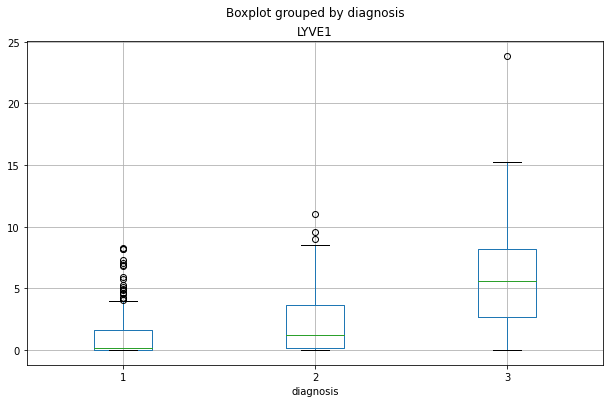

In [30]:
pdac_data.boxplot('LYVE1', by='diagnosis', figsize=(10, 6))

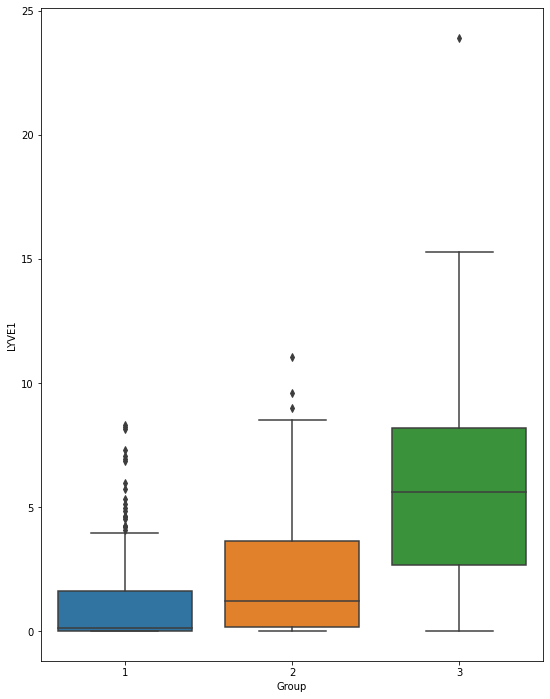

In [31]:
plt.figure(figsize=[9,12])
ax = sns.boxplot(y='LYVE1', x='diagnosis', data=pdac_data).set(xlabel='Group')

### Testing the TFF1 Biomarker for Significant Difference Between Groups

For the TFF1 biomarker, follow the same steps as above to check for a normal distribution within each group:

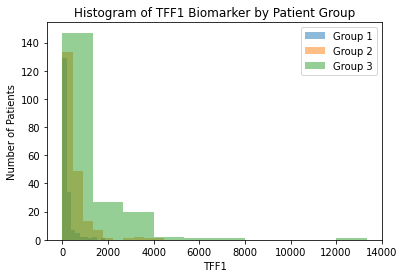

In [32]:
plt.hist(pdac_1['TFF1'], alpha = 0.5, label = 'Group 1')
plt.hist(pdac_2['TFF1'], alpha = 0.5, label = 'Group 2')
plt.hist(pdac_3['TFF1'], alpha = 0.5, label = 'Group 3')
plt.title("Histogram of TFF1 Biomarker by Patient Group")
plt.xlabel('TFF1')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff558062c10>,
      dtype=object)

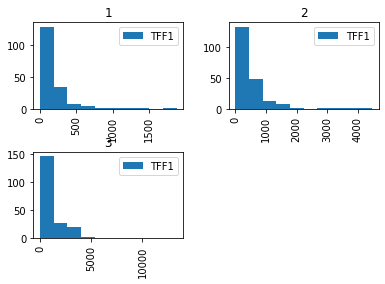

In [33]:
pdac_data['TFF1'].hist(by = pdac_data['diagnosis'], legend=True)

In [34]:
print(stats.describe(pdac_1['TFF1']))
print(stats.describe(pdac_2['TFF1']))
print(stats.describe(pdac_3['TFF1']))

DescribeResult(nobs=183, minmax=(0.00529308, 1876.588322), mean=169.02413960393443, variance=77400.74350509957, skewness=3.169633558892356, kurtosis=12.347297616603498)
DescribeResult(nobs=208, minmax=(0.0132327, 4461.684), mean=448.25689730006735, variance=416674.70285874384, skewness=3.252932347198897, kurtosis=13.69422231391398)
DescribeResult(nobs=199, minmax=(0.02117232, 13344.3), mean=1148.6115271663316, variance=2032308.7255458722, skewness=4.028105447545543, kurtosis=27.039020709446078)


Visually, the distributions appear nonnormal.  Moreover, all kurtosis and skewness values are outside the accepted range for a normal approximation; therefore, these distributions will be considered nonnormal, and the nonparametric test, Kruskal-Wallis, will be used to test for significant difference among the groups.

Start with a 3-group Kruskal-Wallis test:

In [35]:
stats.kruskal(pdac_1['TFF1'], pdac_2['TFF1'], pdac_3['TFF1'])

KruskalResult(statistic=161.8630513310934, pvalue=7.110251971657924e-36)

The p-value indicates that there is a significant difference in the mean TFF1 biomarker between groups.  The null hypothesis can be rejected.

Next, run pairwise Kruskal-Wallis tests to further quantify the differences.

**Group 1** (healthy patients, i.e. control group) to **Group 2** (patients with non-cancerous pancreatic condition):

In [36]:
stats.kruskal(pdac_1['TFF1'], pdac_2['TFF1'])

KruskalResult(statistic=36.55065662754899, pvalue=1.4874984984206755e-09)

Between Group 1 and Group 2, the p-value indicates that there is a significant difference in the mean TFF1.

**Group 2** (patients with non-cancerous pancreatic condition) to **Group 3** (patients with PDAC):

In [37]:
stats.kruskal(pdac_2['TFF1'], pdac_3['TFF1'])

KruskalResult(statistic=59.75732740543142, pvalue=1.073049186607795e-14)

Between Group 2 and Group 3, the p-value indicates that there is a significant difference in the mean TFF1, more significant than the difference between 1 and 2.

**Group 1** (healthy patients, i.e. control group) to **Group 3** (patients with PDAC):

In [38]:
stats.kruskal(pdac_1['TFF1'], pdac_3['TFF1'])

KruskalResult(statistic=149.2510177656377, pvalue=2.5273888782290214e-34)

Between Group 1 and Group 3, the p-value indicates that there is a significant difference in the mean TFF1, and this is the largest difference among the tests.  Calculate the confidence internal for this difference in means:

In [39]:
get_95_ci([1, 3], pdac_1['TFF1'], pdac_3['TFF1'])

'Comparing Group 1 and Group 3, the difference in mean TFF1 at the 95% confidence interval (two-tail) is between 777.4548240655629 and 1181.7199510592316.'

The test shows that with 95% confidence, patients with PDAC have TFF1 levels that are greater than those of healthy patients by an amount between 777 and 1182 on average.

Finally, visualize the difference in means with a boxplot:

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


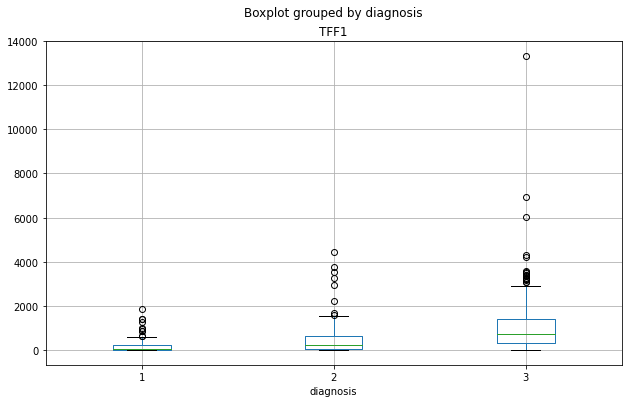

In [40]:
pdac_data.boxplot('TFF1', by='diagnosis', figsize=(10, 6))

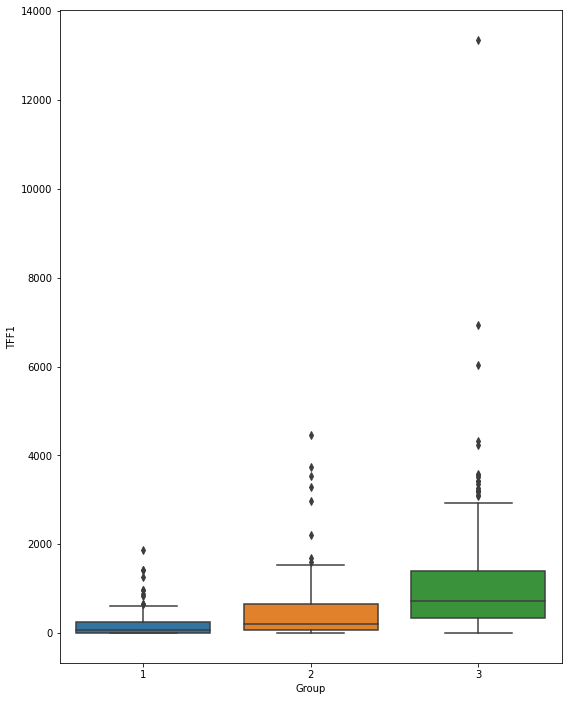

In [41]:
plt.figure(figsize=[9,12])
ax = sns.boxplot(y='TFF1', x='diagnosis', data=pdac_data).set(xlabel='Group')

Group 3 clearly has the greatest mean TFF1, while also having some extreme outliers.

### Checking for Potential Bias from the Sex Sampling

Count the number of males and females in each group:

In [42]:
pdac_1['sex'].value_counts(ascending=True)

M     68
F    115
Name: sex, dtype: int64

In [43]:
pdac_2['sex'].value_counts(ascending=False)

M    107
F    101
Name: sex, dtype: int64

In [44]:
pdac_3['sex'].value_counts(ascending=False)

M    116
F     83
Name: sex, dtype: int64

There could be some potential bias from the male/female sampling of the groups, as Group 1 has a significantly lower number of males, and Group 3 has a significantly lower number of females.

### Checking for Potential Bias from the Age Sampling

Check for a normal distribution of age within each group:

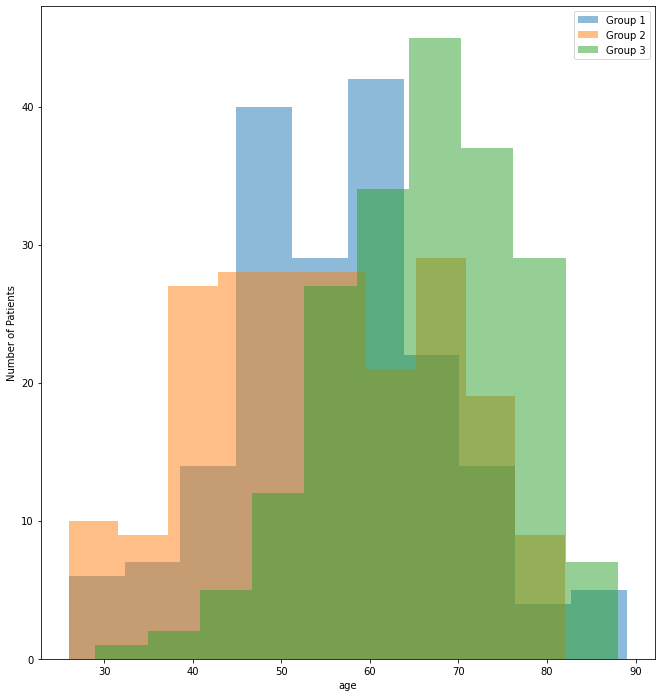

In [45]:
plt.figure(figsize=[11,12])
plt.hist(pdac_1['age'], alpha = 0.5, label = 'Group 1')
plt.hist(pdac_2['age'], alpha = 0.5, label = 'Group 2')
plt.hist(pdac_3['age'], alpha = 0.5, label = 'Group 3')
plt.xlabel('age')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff557c36350>,
      dtype=object)

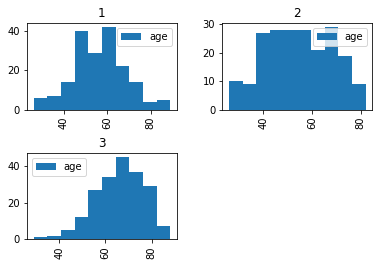

In [46]:
pdac_data['age'].hist(by = pdac_data['diagnosis'], legend=True)

In [47]:
print(stats.describe(pdac_1['age']))
print(stats.describe(pdac_2['age']))
print(stats.describe(pdac_3['age']))

DescribeResult(nobs=183, minmax=(26, 89), mean=56.333333333333336, variance=148.90476190476193, skewness=0.05447487404048888, kurtosis=0.09353468440221668)
DescribeResult(nobs=208, minmax=(26, 82), mean=54.70192307692308, variance=178.04598662207357, skewness=-0.007222169051550782, kurtosis=-0.8855049924879284)
DescribeResult(nobs=199, minmax=(29, 88), mean=66.18090452261306, variance=110.44185574336328, skewness=-0.4787893180750708, kurtosis=0.10661803934535996)


Given the visualizations, the skewness, and the kurtosis, the age distributions can be approximated as normal; therefore, a parametric one-way ANOVA can be used to test for significant differences in mean age between the three groups:

In [48]:
stats.f_oneway(pdac_1['age'], pdac_2['age'], pdac_3['age'])

F_onewayResult(statistic=52.67036840482853, pvalue=9.149475472483798e-22)

The p-value indicates that there is a significant difference in the mean age between groups.  

Next, run a Tukey's HSD test to further quantify the differences:

In [49]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_age = pairwise_tukeyhsd(endog = pdac_data['age'], groups = pdac_data['diagnosis'], alpha = 0.05)

tukey_age.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-1.6314,0.3797,-4.511,1.2482,False
1,3,9.8476,0.001,6.9376,12.7575,True
2,3,11.479,0.001,8.6616,14.2964,True


The p-values indicate that there is a significant difference in mean age between Groups 1 and 3 and between Groups 2 and 3.

Finally, visualize the difference in mean age with a boxplot:

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


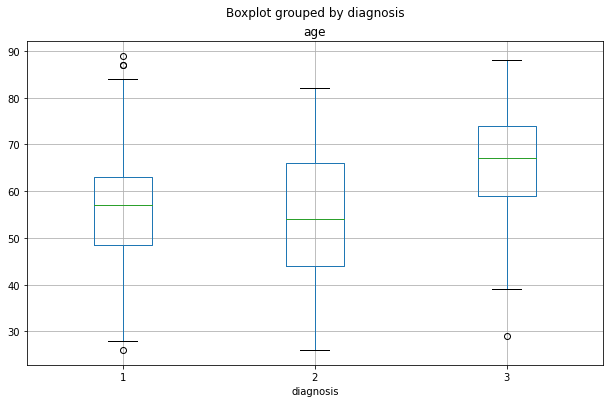

In [50]:
pdac_data.boxplot('age', by='diagnosis', figsize=(10, 6))

Group 3 (patients with PDAC) clearly has the oldest patients on average, indicating potential bias in age sampling.

## Discussion and Recommendation

The analysis suggests that the biomarkers, REG1B, LYVE1, and TFF1, are reliable indicators of PDAC.  However, there could be potential bias in the data due to patient sex and age sampling.

Group 1(healthy patients, i.e. control group) has a significantly lower number of males, and Group 3(patients with PDAC) has a significantly lower number of females. One way to test for sex bias would be to take a random subset of the males from Group 2 and 3, approximately equal to the number of males in Group 1. Likewise, do the same for Groups 1 and 2 of the females. Then split the data further by male and female (6 total dataframes).  Finally, for each biomarker, run statistical male-only and female-only tests between the three diagnoses to see if results are similar to those obtained from the original tests.

The look into age raises the question of whether there was a sampling issue with age or if old age truly does correlate with higher rates of PDAC.  That question of age-PDAC correlation is not something that can be answered with this data.  Nevertheless, the biomarker study could be protected from potential age bias by resampling the patient population such that all three age distributions are more similar.

Another variable that would be useful to test is the stage, i.e. the cancer stage for the Group 3 patients. For the biomarkers, REG1B and TFF1, Group 3 had many outliers on the high end.  Additional tests could check these outliers for a correlation with an advanced stage of PDAC.